# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them
as reference to assess the relative predictive performance of a given model
of interest.

We illustrate those baselines with the help of the Adult Census dataset,
using only the numerical features for the sake of simplicity.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [2]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

In [3]:
from helpers import myfunctions as my

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [5]:
# Write your code here.
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lr = LogisticRegression()
pipe = make_pipeline(scaler, lr,)
my.plot_pipe()
pipe


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Compute the cross-validation (test) scores for the classifier on this
dataset. Store the results pandas Series as we did in the previous notebook.

In [15]:
# Write your code here.
import pandas as pd
from sklearn.model_selection import cross_validate

cv_results_log_regressor = cross_validate(
    pipe, data, target, cv=cv, n_jobs=2
)

testscores_log_regressor = pd.Series(
    cv_results_log_regressor["test_score"], name="Logistic Regression"
)
testscores_log_regressor.describe()

count    10.000000
mean      0.813832
std       0.002085
min       0.810327
25%       0.812590
50%       0.814279
75%       0.815435
max       0.816388
Name: Logistic Regression, dtype: float64

In [16]:
testscores_log_regressor

0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814709
6    0.813112
7    0.810327
8    0.812416
9    0.816388
Name: Logistic Regression, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that
constantly predicts the most frequent class observed the training set. Please
refer to the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [13]:
# Write your code here.
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=0)
cv_results_dummy = cross_validate(dummy, data, target, cv=cv, n_jobs=2)

In [14]:
testscores_dummy = pd.Series(
    cv_results_dummy["test_score"], name="Dummy Classifier"
)
testscores_dummy.describe()

count    10.000000
mean      0.760022
std       0.002251
min       0.756808
25%       0.757883
50%       0.760534
75%       0.761834
max       0.763114
Name: Dummy Classifier, dtype: float64

Now that we collected the results from the baseline and the model,
concatenate the test scores as columns a single pandas dataframe.

In [17]:
# Write your code here.
all_scores = pd.concat(
    [testscores_log_regressor, testscores_dummy],
    axis=1,
)
all_scores

,Logistic Regression,Dummy Classifier
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814709,0.761885
6,0.813112,0.757463
7,0.810327,0.757176
8,0.812416,0.761885
9,0.816388,0.763114



Next, plot the histogram of the cross-validation test scores for both
models with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

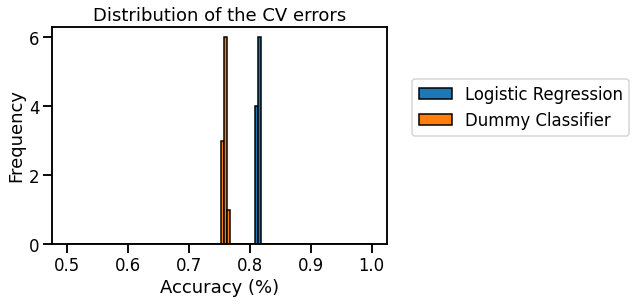

In [18]:
# Write your code here.
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0.5, stop=1.0, num=100)
all_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Distribution of the CV errors")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

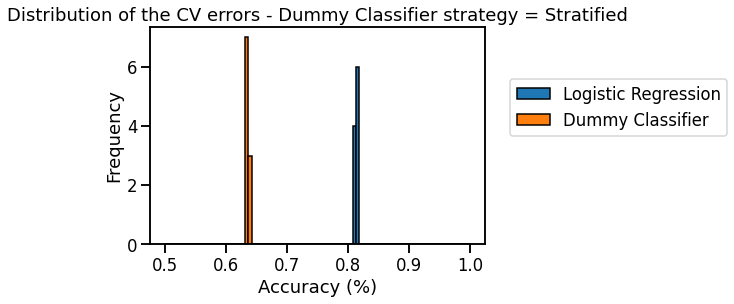

In [19]:
# Write your code here.
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="stratified", random_state=0)
cv_results_dummy = cross_validate(dummy, data, target, cv=cv, n_jobs=2)
testscores_dummy = pd.Series(
    cv_results_dummy["test_score"], name="Dummy Classifier"
)
testscores_dummy.describe()
all_scores = pd.concat(
    [testscores_log_regressor, testscores_dummy],
    axis=1,
)
bins = np.linspace(start=0.5, stop=1.0, num=100)
all_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Distribution of the CV errors - Dummy Classifier strategy = Stratified")

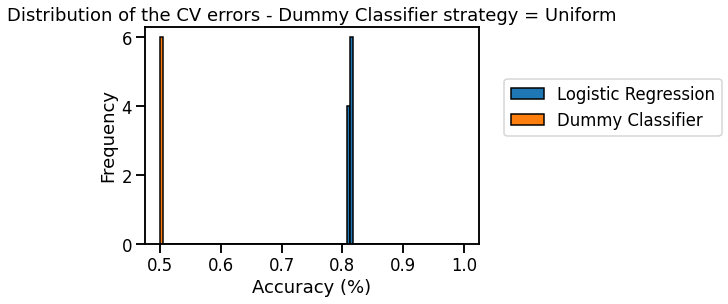

In [20]:
# Write your code here.
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="uniform", random_state=0)
cv_results_dummy = cross_validate(dummy, data, target, cv=cv, n_jobs=2)
testscores_dummy = pd.Series(
    cv_results_dummy["test_score"], name="Dummy Classifier"
)
testscores_dummy.describe()
all_scores = pd.concat(
    [testscores_log_regressor, testscores_dummy],
    axis=1,
)
bins = np.linspace(start=0.5, stop=1.0, num=100)
all_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Distribution of the CV errors - Dummy Classifier strategy = Uniform")